## Class : C550-T301 Data Mining (2241-1)
## Name : Rajib Samanta
### Assignment : Week 7

#### Part 1: PCA and Variance Threshold in a Linear Regression
    
1. Import the housing data as a data frame and ensure that the data is loaded properly.
2. Drop the "Id" column and any features that are missing more than 40% of their values.
3. For numerical columns, fill in any missing data with the median value.
4. For categorical columns, fill in any missing data with the most common value (mode).
5. Convert the categorical columns to dummy variables.
6. Split the data into a training and test set, where the SalePrice column is the target.
7. Run a linear regression and report the R2-value and RMSE on the test set.
8. Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).
9. How many features are in the PCA-transformed matrix?
10. Transform but DO NOT fit the test features with the same PCA.
11. Repeat step 7 with your PCA transformed data.
12. Take your original training features (from step 6) and apply a min-max scaler to them.
13. Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).
14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.
15. Repeat step 7 with the high variance data.
16. Summarize your findings.

In [73]:
# Import Libraries
import pandas as pd
import os
#pip install textblob
from textblob import TextBlob
# pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier

In [74]:
# Read the labeled training dataset  file ('labeledTrainData.tsv') from local:
directory = '/Users/rajibsamanta/Documents/Rajib/College/Sem6_fall_2023/Week7' 
# Set the working directory
os.chdir(directory)
print(os.getcwd())
# 1. Import the movie review data as a data frame and ensure that the data is loaded properly.

file_name = "train.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_name)

# Display few records.
df.head()

/Users/rajibsamanta/Documents/Rajib/College/Sem6_fall_2023/Week7


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
# 2. Drop the "Id" column and any features that are missing more than 40% of their values.
# Drop the "Id" column
df.drop(columns=['Id'], inplace=True)

# Calculate the threshold for dropping columns
threshold = 0.4 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Check the resulting dataset
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [77]:
# 3. For numerical columns, fill in any missing data with the median value.
# Identify numerical columns with missing values
# Find numerical columns with missing values
numerical_columns_with_missing = df.select_dtypes(include=['number']).columns[df.select_dtypes(include=['number']).isnull().any()]

# Print the numerical columns with missing values
print(numerical_columns_with_missing)
# Fill missing values with the median for numerical columns
for column in numerical_columns_with_missing:
    median = df[column].median()
    df[column].fillna(median, inplace=True)

# Check the resulting dataset
df.head()


Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [78]:
# 4. For categorical columns, fill in any missing data with the most common value (mode).
# Identify categorical columns with missing values
#categorical_columns_with_missing = df.select_dtypes(exclude=['number']).columns[df.isnull().any()]
categorical_columns_with_missing = df.select_dtypes(exclude=['number']).columns[df.select_dtypes(exclude=['number']).isnull().any()]

# Fill missing values with the mode for categorical columns
for column in categorical_columns_with_missing:
    mode = df[column].mode().iloc[0]  # Calculate the mode (most common value) of the column
    df[column].fillna(mode, inplace=True)

# Check the resulting dataset
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

##### It shows all 1460 etries for all columns have values.

In [80]:
# 5. Convert the categorical columns to dummy variables.
# Identify categorical columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check the resulting dataset
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [81]:
# 6. Split the data into a training and test set, where the SalePrice column is the target.
# Define features (X) and target (y)
X = df.drop(columns=['SalePrice'])  # Features (all columns except 'SalePrice')
y = df['SalePrice']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1168, 236)
X_test shape: (292, 236)
y_train shape: (1168,)
y_test shape: (292,)


In [82]:
# 7. Run a linear regression and report the R2-value and RMSE on the test set.
# Initialize and train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate R-squared (R2) and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Report the results
print("R-squared (R2) on the test set:", r2)
print("Root Mean Squared Error (RMSE) on the test set:", rmse)

R-squared (R2) on the test set: 0.6443655136574274
Root Mean Squared Error (RMSE) on the test set: 52228.65612643088


0 < R2 < 1: The model explains a portion of the variation in the target variable. A higher R2 value indicates a better fit, with values closer to 1 indicating a stronger relationship between the features and the target. Here it is 0.64 means that the model has medium positive relationship.

In [83]:
# 8. Fit and transform the training features with a PCA so that 90% of the variance is retained 
# 9. How many features are in the PCA-transformed matrix?
# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA to retain 90% of the variance
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)

# Check the number of retained principal components
print("Number of retained principal components:", X_pca.shape[1])

Number of retained principal components: 133


Number of retained principal components: 133

In [84]:
# 10. Transform but DO NOT fit the test features with the same PCA.
# Use the same PCA transformation on the test features (without refitting)
X_test_scaled = scaler.transform(X_test)  # Standardize the test features
X_test_pca = pca.transform(X_test_scaled)  # Apply the same PCA transformation

# Check the shape of the PCA-transformed test features
print("Shape of PCA-transformed test features:", X_test_pca.shape)

Shape of PCA-transformed test features: (292, 133)


In [85]:
# 11. Repeat step 7 with your PCA transformed data
# Initialize and train a linear regression model on the PCA-transformed training data
lr = LinearRegression()
lr.fit(X_test_pca, y_test)

# Make predictions on the PCA-transformed test data
y_pred_pca = lr.predict(X_test_pca)

# Calculate R-squared (R2) and RMSE
r2_pca = r2_score(y_test, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))

# Report the results
print("R-squared (R2) on the PCA-transformed test set:", r2_pca)
print("Root Mean Squared Error (RMSE) on the PCA-transformed test set:", rmse_pca)

R-squared (R2) on the PCA-transformed test set: 0.949684899472069
Root Mean Squared Error (RMSE) on the PCA-transformed test set: 19645.183485950038


0 < R2 < 1: A higher R2 value indicates a better fit, with values closer to 1 indicating a stronger relationship between the features and the target. Here it is 0.9496 means that the model has strong positive relationship.

In [86]:
# 12. Take your original training features (from step 6) and apply a min-max scaler to them.
# Define features (X) and target (y)
X = df.drop(columns=['SalePrice'])  # Original training features (all columns except 'SalePrice')
y = df['SalePrice']  # Target variable

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the features using the Min-Max scaler
X_scaled = scaler.fit_transform(X)

# Check the resulting scaled features
print("Scaled features using Min-Max scaler:")
print(X_scaled)

Scaled features using Min-Max scaler:
[[0.23529412 0.15068493 0.0334198  ... 0.         1.         0.        ]
 [0.         0.20205479 0.03879502 ... 0.         1.         0.        ]
 [0.23529412 0.1609589  0.04650728 ... 0.         1.         0.        ]
 ...
 [0.29411765 0.15410959 0.03618687 ... 0.         1.         0.        ]
 [0.         0.1609589  0.03934189 ... 0.         1.         0.        ]
 [0.         0.18493151 0.04037019 ... 0.         1.         0.        ]]


In [87]:
# 13. Find the min-max scaled features in your training set that have a variance above 0.1
# Initialize the VarianceThreshold selector with a threshold of 0.1
selector = VarianceThreshold(threshold=0.1)

# Fit the selector on the scaled features
selector.fit(X_scaled)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Check the names of the selected features
print("Selected features with variance above 0.1:")
print(selected_features)

Selected features with variance above 0.1:
Index(['YearRemodAdd', 'YrSold', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_Reg',
       'LotConfig_Inside', 'Neighborhood_NAmes', 'Condition1_Norm',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard',
       'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'BsmtFinType2_Unf', 'HeatingQC_Gd', 'HeatingQC_TA',
       'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_TA',
       'GarageType_Attchd', 'GarageType_Detchd', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'SaleType_WD', 'SaleCondition_Normal'],
      

In [88]:
# 14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.
# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the training features using the Min-Max scaler
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the VarianceThreshold selector with a threshold of 0.1
selector = VarianceThreshold(threshold=0.1)

# Fit the selector on the scaled training features
selector.fit(X_train_scaled)

# Transform the test features using the same Min-Max scaling and variance threshold
X_test_scaled = scaler.transform(X_test)
X_test_filtered = selector.transform(X_test_scaled)

# Check the shape of the transformed test features
print("Shape of test features after Min-Max scaling and variance threshold filtering:", X_test_filtered.shape)

Shape of test features after Min-Max scaling and variance threshold filtering: (292, 44)


In [89]:
# 15. Repeat step 7 with the high variance data.
# Define features (X) and target (y)
X = df.drop(columns=['SalePrice'])  # Features (all columns except 'SalePrice')
y = df['SalePrice']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the training features using the Min-Max scaler
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the VarianceThreshold selector with a threshold of 0.1
selector = VarianceThreshold(threshold=0.1)

# Fit the selector on the scaled training features
selector.fit(X_train_scaled)

# Transform the training and test features using the same Min-Max scaling and variance threshold
X_train_filtered = selector.transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_filtered = selector.transform(X_test_scaled)

# Initialize and train a linear regression model on the training data
lr = LinearRegression()
lr.fit(X_train_filtered, y_train)

# Make predictions on the test data with the high variance data
y_pred_filtered = lr.predict(X_test_filtered)

# Calculate R-squared (R2) and RMSE
r2_filtered = r2_score(y_test, y_pred_filtered)
rmse_filtered = np.sqrt(mean_squared_error(y_test, y_pred_filtered))

# Report the results
print("R-squared (R2) on the test set with high variance data:", r2_filtered)
print("Root Mean Squared Error (RMSE) on the test set with high variance data:", rmse_filtered)

X_train shape: (1168, 236)
X_test shape: (292, 236)
y_train shape: (1168,)
y_test shape: (292,)
R-squared (R2) on the test set with high variance data: 0.6223372171333519
Root Mean Squared Error (RMSE) on the test set with high variance data: 49573.384043468955


#### Using the PCA the R-squared (R2) value is 0.95 which is closed to 1 , means model has strong relationship and its close to actual whereas with attribute's feature linear regression model's R-squared (R2) is around 0.6 means meduim accurecy.

### Part 2: Categorical Feature Selection
1. Import the data as a data frame and ensure it is loaded correctly.
2. Convert the categorical features (all of them) to dummy variables.
3. Split the data into a training and test set.
4. Fit a decision tree classifier on the training set.
5. Report the accuracy and create a confusion matrix for the model prediction on the test set.
6. Create a visualization of the decision tree.
7. Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).
8. Which five features were selected in step 7? Hint: Use the get_support function.
9. Repeat steps 4 and 5 with the five best features selected in step 7.
10. Summarize your findings.



In [90]:

# 1. Import the data as a data frame and ensure it is loaded correctly.

file_name = "mushrooms.csv"

# Load the dataset into a pandas DataFrame
dataset = pd.read_csv(file_name)

# Display few records.
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [92]:
# 2. Convert the categorical features (all of them) to dummy variables.

# Convert categorical features to dummy variables
dataset_dummies = pd.get_dummies(dataset)

# Save the dataset with dummy variables to a new CSV file
dataset_dummies.to_csv('mushrooms_with_dummies.csv', index=False)
dataset_dummies.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [93]:
dataset_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 119 entries, class_e to habitat_w
dtypes: uint8(119)
memory usage: 944.2 KB


In [94]:
print(dataset.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [95]:
# 3. Split the data into a training and test set.
# 4. Fit a decision tree classifier on the training set.
# Encode categorical features into dummy variables
dataset = pd.get_dummies(dataset, columns=dataset.select_dtypes(include=['object']).columns)

# Split the data into features (X) and the target (y)
X = dataset.drop(columns=['class_e'])  # Features (all columns except 'class')
y = dataset['class_e']  # Target variable

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [96]:
# 5. Report the accuracy and create a confusion matrix for the model prediction on the test set.
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[782   0]
 [  0 843]]


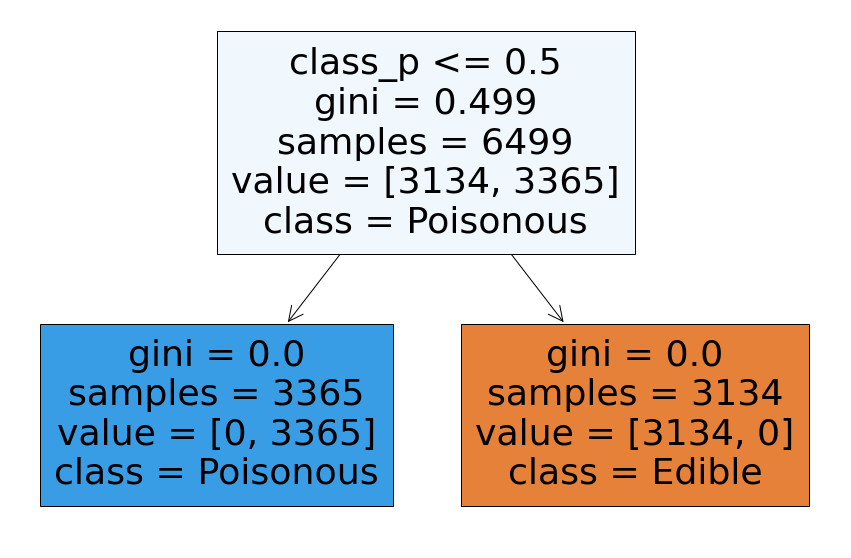

In [97]:
# 6. Create a visualization of the decision tree.
# Create a figure and set its size
plt.figure(figsize=(15, 10))

# Use the plot_tree function to visualize the decision tree
plot_tree(clf, feature_names=X.columns, class_names=["Edible", "Poisonous"], filled=True)

# Display the tree plot
plt.show()

In [98]:
# 7. Use a χ2-statistic selector to pick the five best features for this data 
# 8. Which five features were selected in step 7?
# Initialize the SelectKBest feature selector with chi2 scoring
selector = SelectKBest(score_func=chi2, k=5)  # Select the top 5 features

# Fit the selector on the features and target
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the names of the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['class_p', 'odor_f', 'odor_n', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'],
      dtype='object')


#### Selected Features : 'class_p', 'odor_f', 'odor_n', 'stalk-surface-above-ring_k','stalk-surface-below-ring_k'

In [99]:
# 9. Repeat steps 4 and 5 with the five best features selected in step 7.

# Use only the selected features for X
X_selected = X[selected_features]

# Split the data into a training set and a test set using the selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf_selected = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training set using the selected features
clf_selected.fit(X_train_selected, y_train)

DecisionTreeClassifier(random_state=42)

In [100]:
# 9.2 : Report the accuracy and create a confusion matrix for the model prediction on the test set.
# Make predictions on the test set using the model with selected features
y_pred_selected = clf_selected.predict(X_test_selected)

# Calculate the accuracy
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy (Selected Features):", accuracy_selected)

# Create a confusion matrix
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
print("Confusion Matrix (Selected Features):")
print(conf_matrix_selected)

Accuracy (Selected Features): 1.0
Confusion Matrix (Selected Features):
[[782   0]
 [  0 843]]


Predicted
              Negative  Positive
Actual  Negative    TN       FP
        Positive    FN       TP
1. True Positives (TP): These are correct positive predictions, indicating that the model correctly identified cases of the positive class & the value is 843
2. True Negatives (TN): These are correct negative predictions, indicating that the model correctly identified cases of the negative class & the value is 782
3. False Positives (FP): These are incorrect positive predictions, meaning the model predicted the positive class when it was actually the negative class. This is also known as a Type I error. The value is 0, which means good model.
4. False Negatives (FN): These are incorrect negative predictions, meaning the model predicted the negative class when it was actually the positive class. This is also known as a Type II error.The value is 0, which means good model.
* The confusion matrix is a valuable tool for understanding the performance of a classification model and can be used to calculate various evaluation metrics such as accuracy, precision, recall, and F1-score. These metrics help assess the model's overall performance and the balance between true and false predictions.This model shows strong prediction results.





